In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
# Load dataset
file_path = r"C:\Users\bhanu\OneDrive\Desktop\Assignment-1\raw\synthetic_bmi_data.csv"  # Update if needed
df = pd.read_csv(file_path)


In [7]:
# Display basic information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 70.4 KB


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      160             44             22       92  22.6   
1            3      153            104             43      238  37.7   
2            7      109             69             31      204  17.5   
3            4      149             60             32       47  42.7   
4            6      117            109             12      244  24.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.629   32        0  
1                     1.337   48        1  
2                     0.346   60        0  
3                     1.904   54        1  
4                     2.275   54        0

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\\n", missing_values)

Missing Values:\n Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
# Summary statistics
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness      Insulin  \
count  1000.000000  1000.00000     1000.00000    1000.000000  1000.000000   
mean      4.448000   123.00600       78.16700      29.557000   155.602000   
std       2.912005    44.06454       22.53235      11.466919    86.317938   
min       0.000000    50.00000       40.00000      10.000000     0.000000   
25%       2.000000    85.00000       59.00000      20.000000    81.000000   
50%       4.000000   121.50000       78.00000      30.000000   162.000000   
75%       7.000000   163.00000       98.00000      39.000000   227.250000   
max       9.000000   199.00000      119.00000      49.000000   299.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  1000.000000               1000.000000  1000.000000  1000.000000  
mean     29.737600                  1.269321    48.468000     0.504000  
std       8.592022                  0.706566    17.611676     0.500234  
min      15.000000                  0.102000    18.000000     0.000000  
25%      22.475000                  0.652500    33.000000     0.000000  
50%      29.550000                  1.260500    49.000000     1.000000  
75%      37.200000                  1.878750    63.000000     1.000000  
max      44.900000                  2.498000    79.000000     1.000000

In [10]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)


Duplicate Rows: 0


In [11]:
# Drop duplicates if any
df = df.drop_duplicates()

In [14]:
# Fill missing values (if any exist) using median strategy
df.fillna(df.median(numeric_only=True), inplace=True)

In [18]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [19]:
# Check for categorical features (this dataset has only numerical features)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: []


In [20]:
# One-hot encoding (if needed)
if categorical_features:
    df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [21]:
# Split dataset into features (X) and target (y)
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Display shapes
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (800, 8) (800,)
Testing Data Shape: (200, 8) (200,)


In [24]:
# Save the processed dataset
processed_file_path = r"C:\Users\bhanu\OneDrive\Desktop\Assignment-1\Processed_Data\processed_synthetic_bmi_data.csv"
df.to_csv(processed_file_path, index=False)

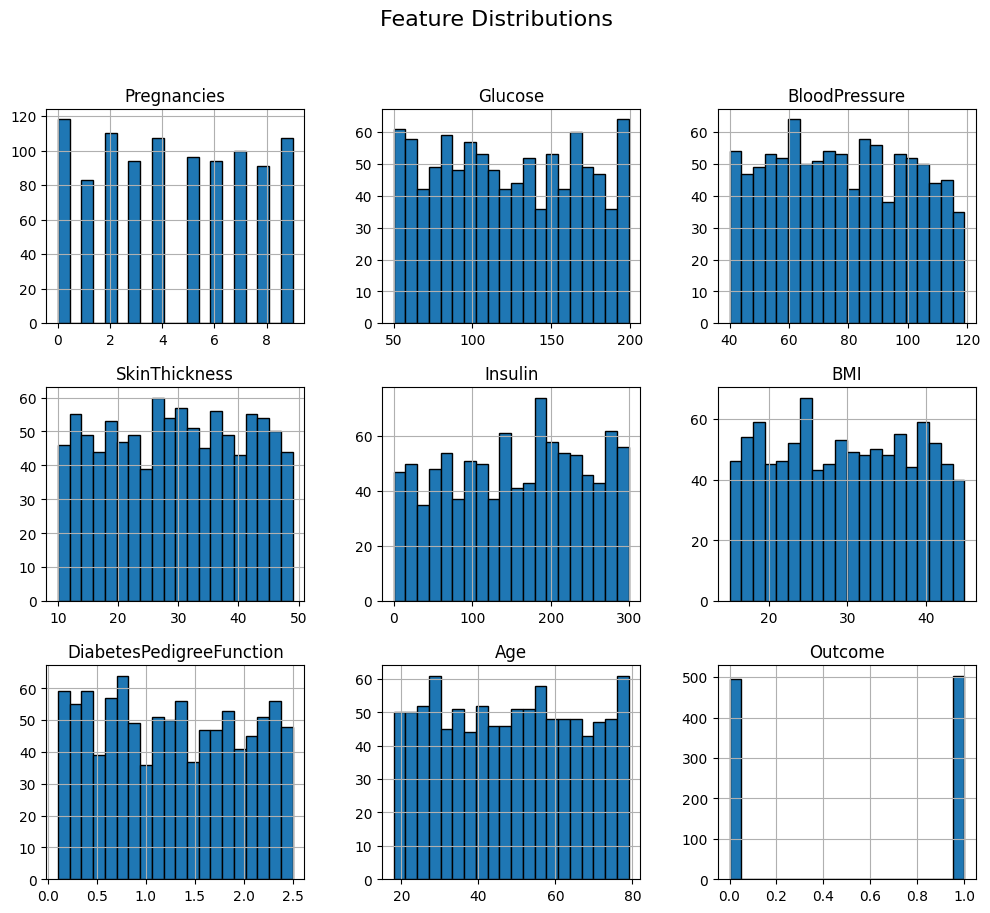

In [6]:
# Histograms for numerical features
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

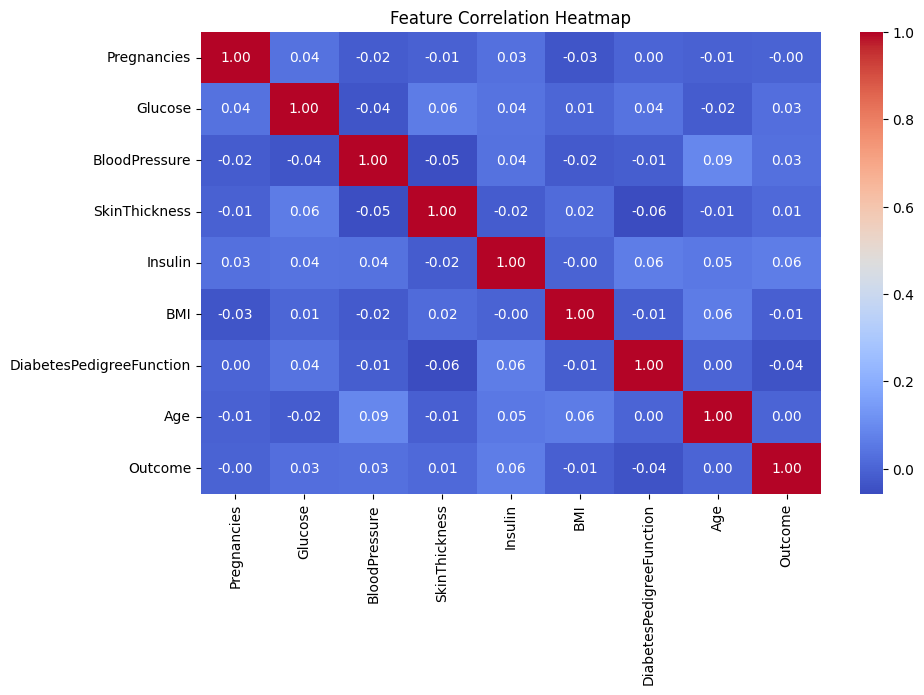

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

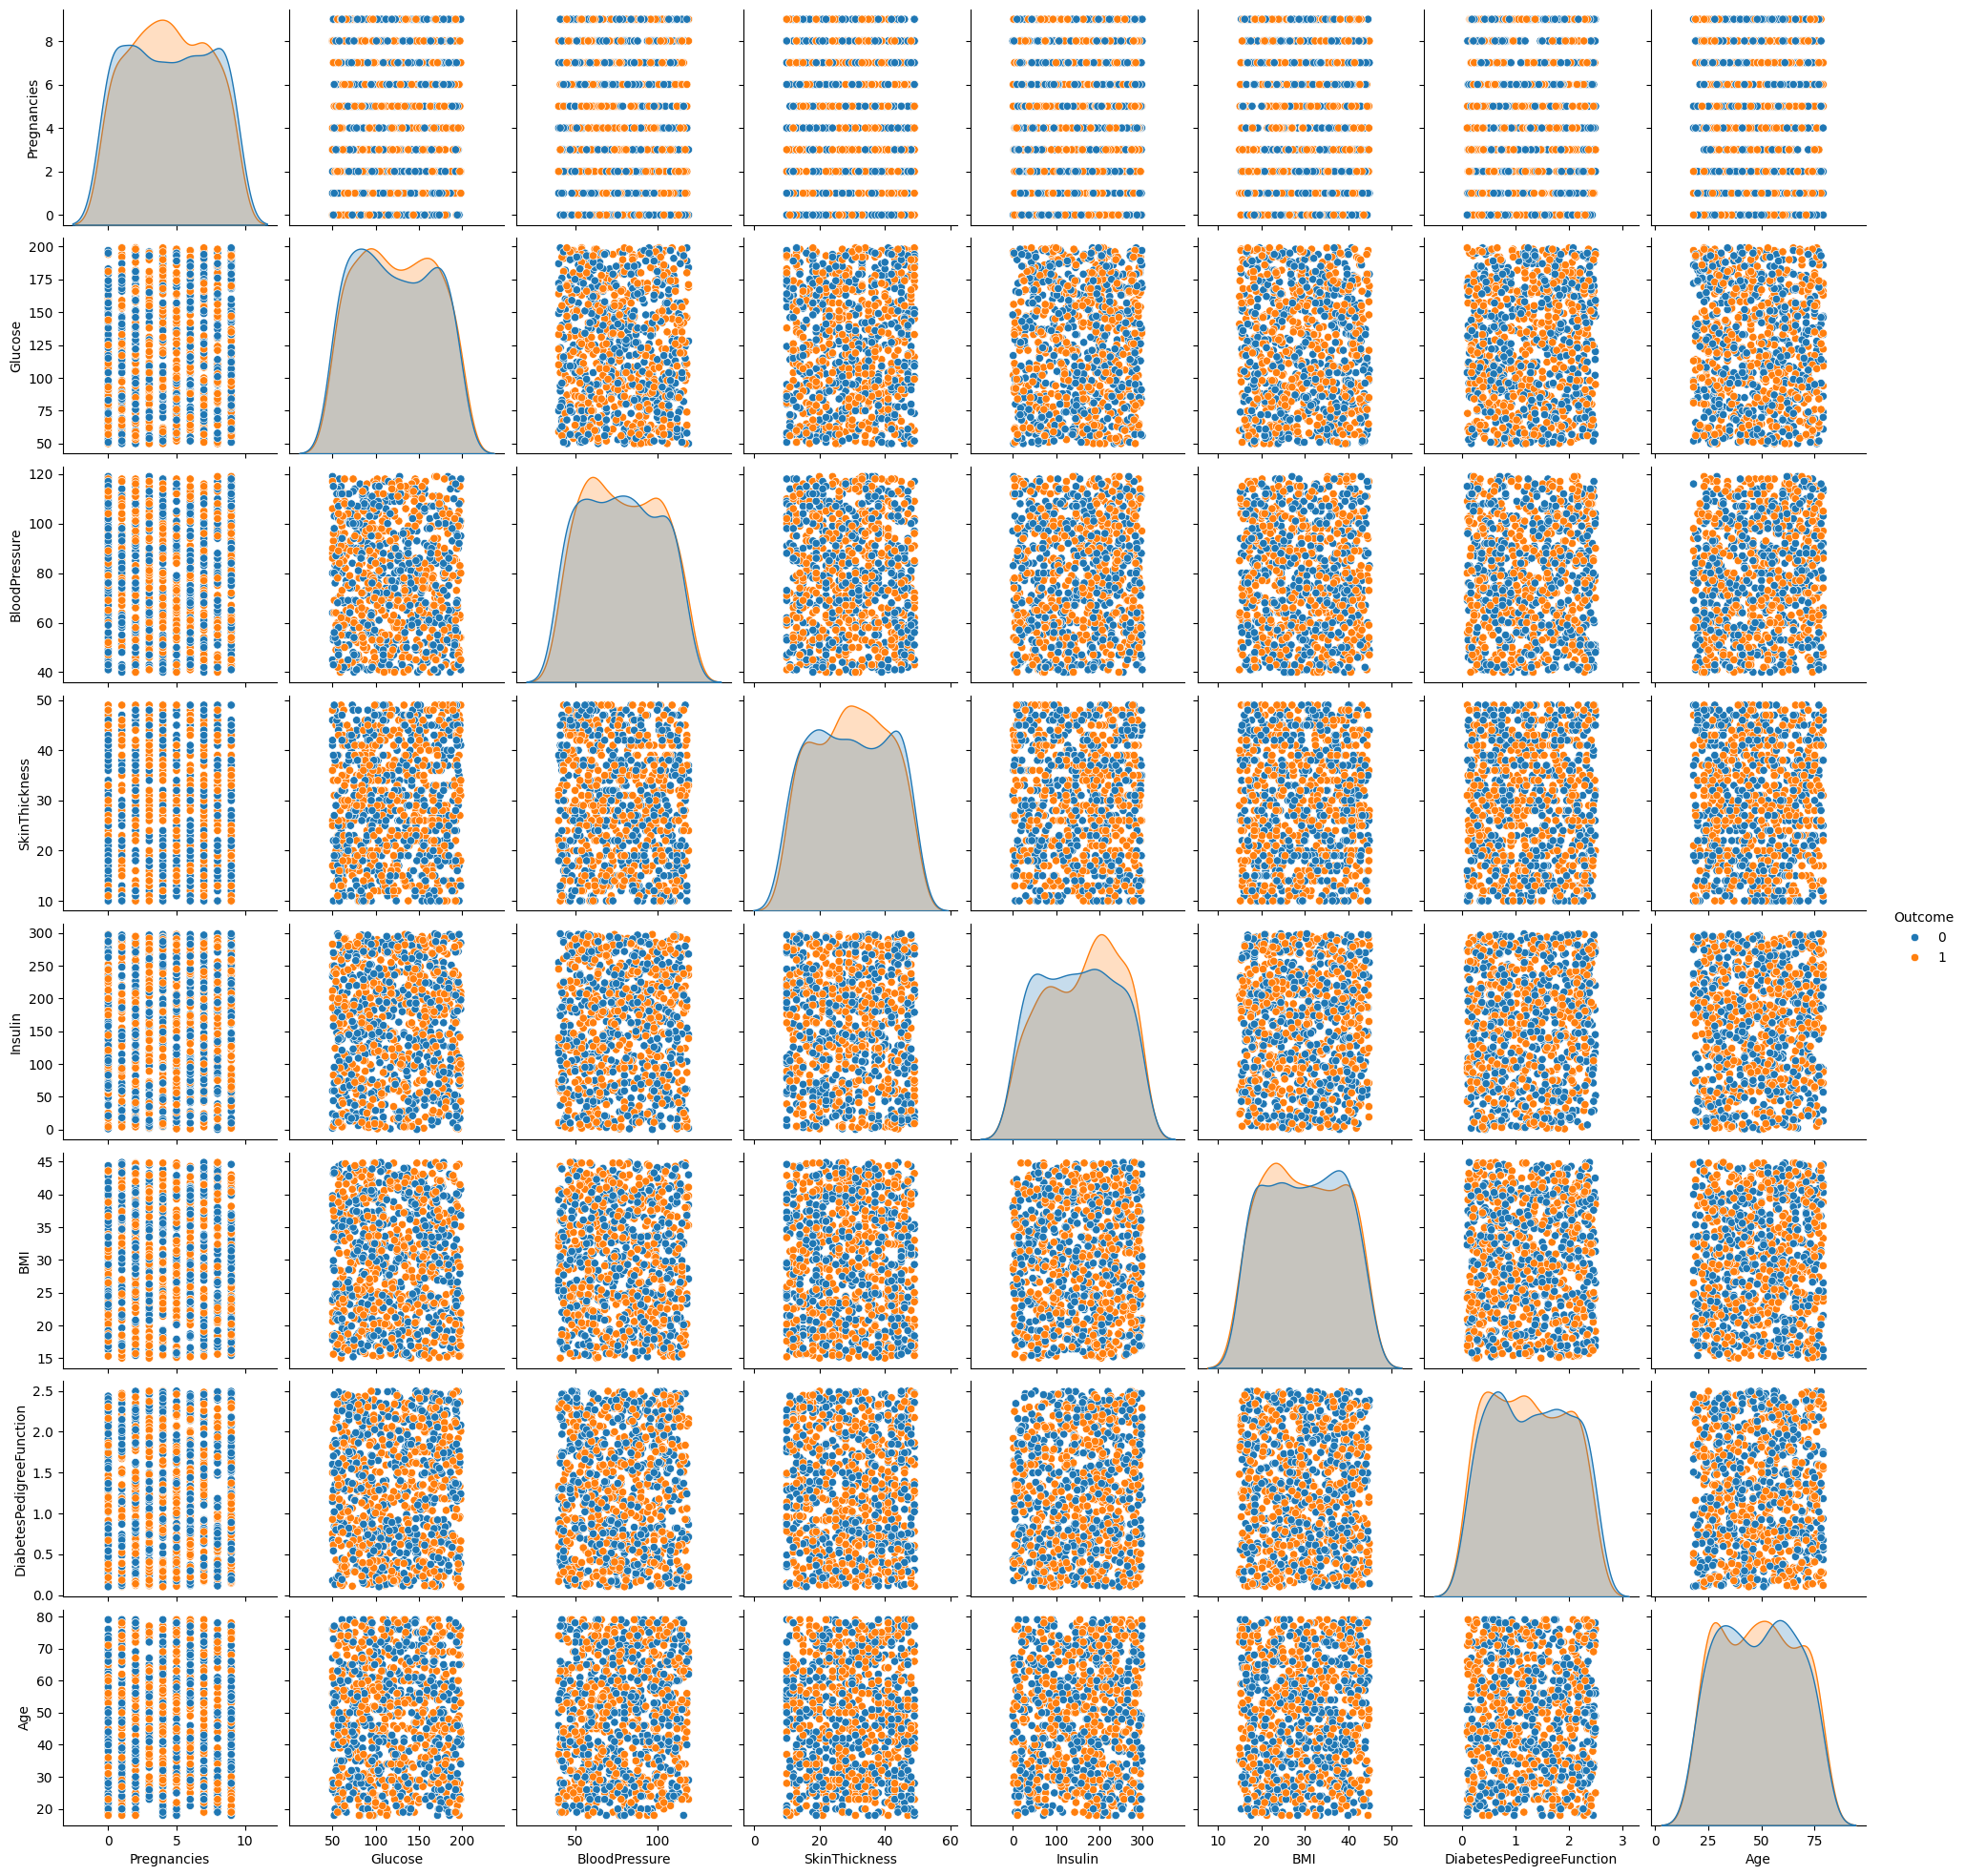

In [8]:
# Pairplot for feature relationships
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

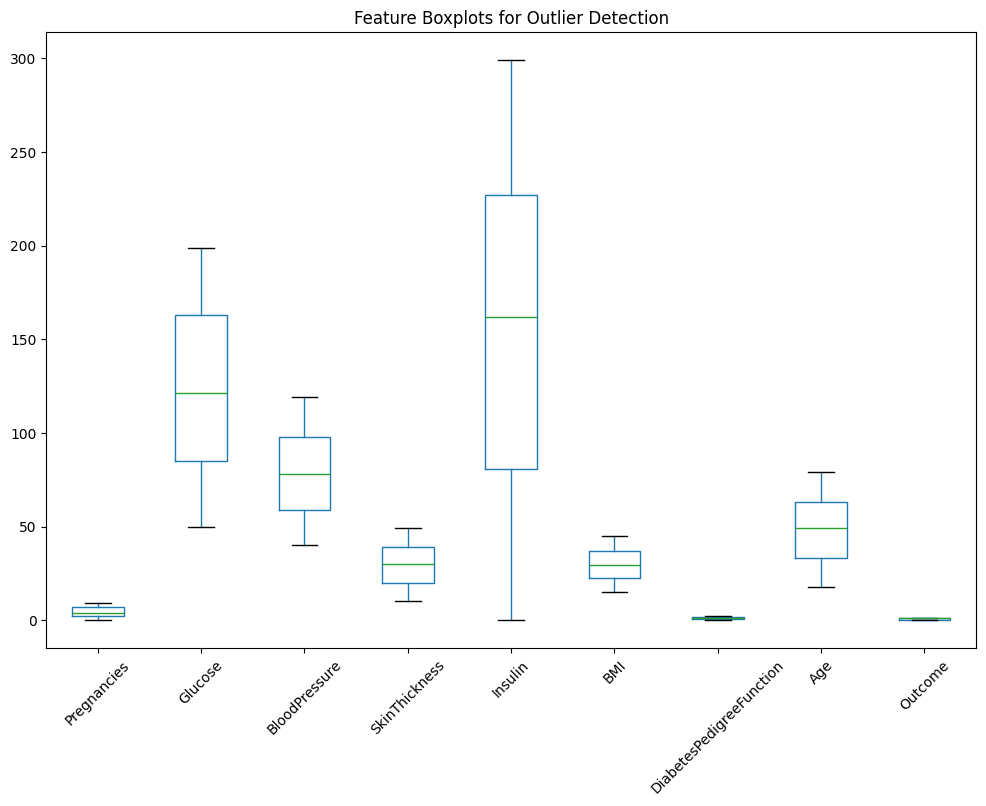

In [9]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
df.boxplot(rot=45, grid=False)
plt.title("Feature Boxplots for Outlier Detection")
plt.show()


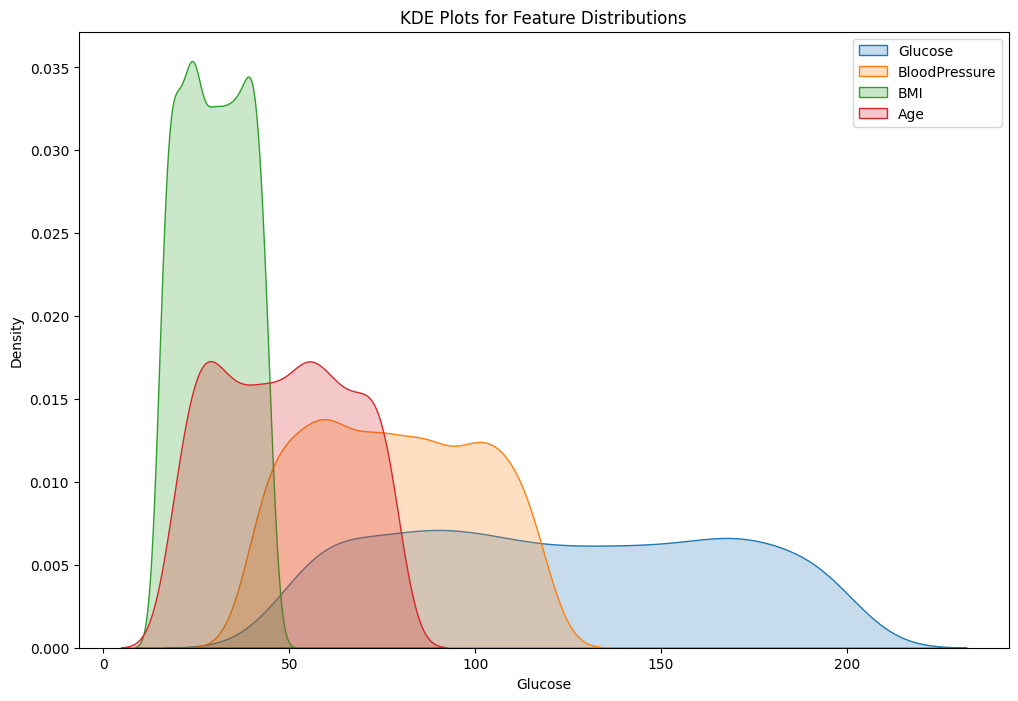

In [11]:
# KDE plots for numerical features
plt.figure(figsize=(12, 8))
for column in ['Glucose', 'BloodPressure', 'BMI', 'Age']:
    sns.kdeplot(df[column], label=column, fill=True)  # Updated 'shade' -> 'fill'
plt.legend()
plt.title("KDE Plots for Feature Distributions")
plt.show()


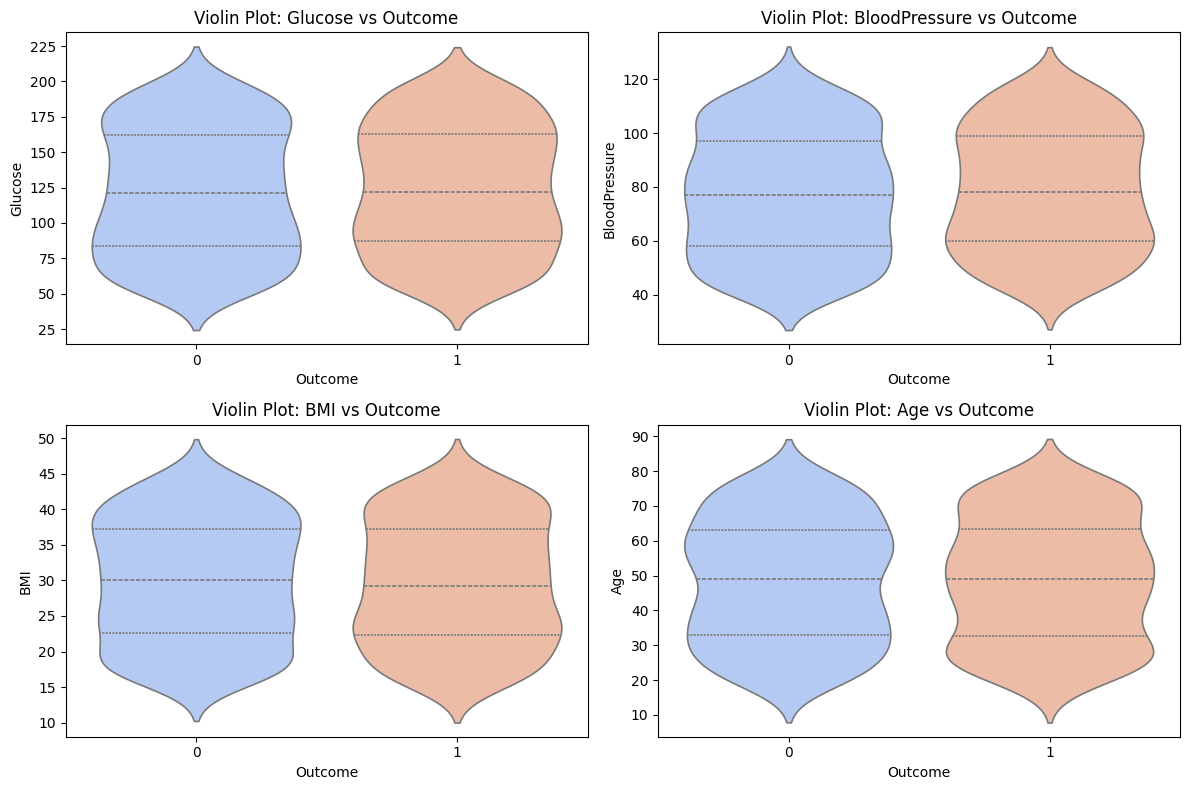

In [13]:
# Violin plots for feature distributions by Outcome
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

features = ['Glucose', 'BloodPressure', 'BMI', 'Age']

for ax, column in zip(axes.flatten(), features):
    sns.violinplot(x="Outcome", y=column, hue="Outcome", data=df, palette="coolwarm", inner="quartile", linewidth=1.2, legend=False, ax=ax)
    ax.set_title(f"Violin Plot: {column} vs Outcome")

plt.tight_layout()
plt.show()


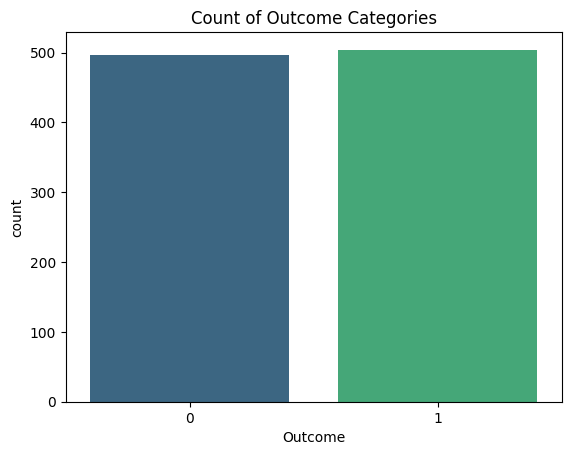

In [15]:
# Count plot for Outcome variable
sns.countplot(x="Outcome", hue="Outcome", data=df, palette="viridis", legend=False)
plt.title("Count of Outcome Categories")
plt.show()


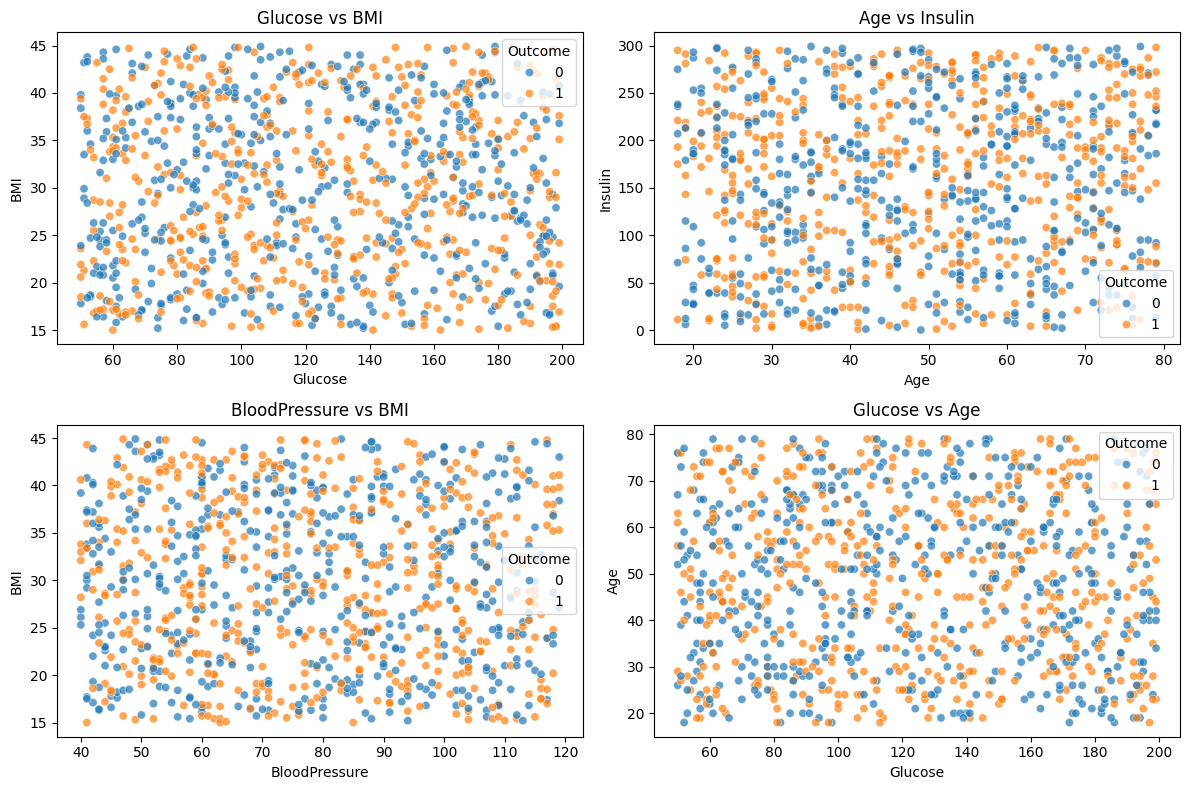

In [16]:
# Scatter plots for key relationships
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=df, alpha=0.7)
plt.title("Glucose vs BMI")

plt.subplot(2, 2, 2)
sns.scatterplot(x="Age", y="Insulin", hue="Outcome", data=df, alpha=0.7)
plt.title("Age vs Insulin")

plt.subplot(2, 2, 3)
sns.scatterplot(x="BloodPressure", y="BMI", hue="Outcome", data=df, alpha=0.7)
plt.title("BloodPressure vs BMI")

plt.subplot(2, 2, 4)
sns.scatterplot(x="Glucose", y="Age", hue="Outcome", data=df, alpha=0.7)
plt.title("Glucose vs Age")

plt.tight_layout()
plt.show()

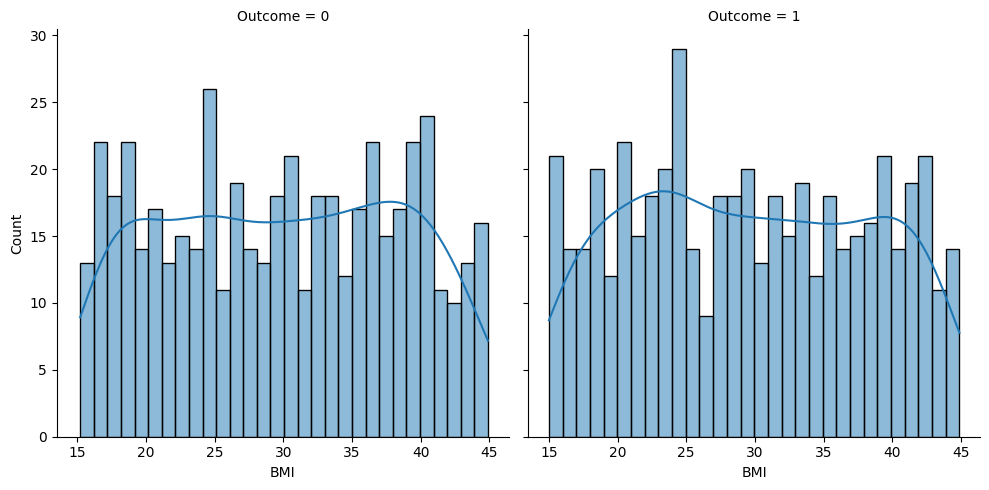

In [17]:
# FacetGrid for BMI distribution across Outcome
g = sns.FacetGrid(df, col="Outcome", height=5, aspect=1)
g.map(sns.histplot, "BMI", bins=30, kde=True)
plt.show()